In [2]:
import nibabel as nib
import numpy as np
import nilearn.plotting as nip
import seaborn as sns
from matplotlib.colors import ListedColormap
from nibabel.affines import apply_affine
import numpy.linalg as npl
from nilearn.reporting import get_clusters_table

from nilearn.datasets import fetch_atlas_difumo
difumo_data = fetch_atlas_difumo(dimension=512, resolution_mm=2, data_dir=None, resume=True, verbose=1, legacy_format=False)
# load 4d image and fetch the first volume
difumo_4d = nib.load(difumo_data['maps'])

def get_difumo_label(word_coord):
    voxel_coord = apply_affine(npl.inv(difumo_4d.affine), word_coord).astype(int)
    max = np.max(difumo_4d.get_fdata()[voxel_coord[0], voxel_coord[1], voxel_coord[2], :])
    argmax = np.argmax(difumo_4d.get_fdata()[voxel_coord[0], voxel_coord[1], voxel_coord[2], :])
    location = difumo_data['labels'].iloc[argmax, :] 
    return location['difumo_names'], location['yeo_networks17'], max

/Users/tspisak/src/placebo-conditioning-meta-analysis/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
dir_mediation = '/Users/tspisak/data/PIC_conditioning_withinsub_nodatalad/mediation_signflipped'

In [4]:
!ls /Users/tspisak/data/PIC_conditioning_withinsub_nodatalad/mediation_signflipped

beta_ACME.nii.gz        fdr_logq_XM.nii.gz      uncorr_logp_ACME.nii.gz
beta_MY.nii.gz          fdr_logq_XMY.nii.gz     uncorr_logp_MY.nii.gz
beta_XM.nii.gz          thres_ACME.nii.gz       uncorr_logp_XM.nii.gz
beta_XMY.nii.gz         thres_MY.nii.gz         uncorr_logp_XMY.nii.gz
fdr_logq_ACME.nii.gz    thres_XM.nii.gz
fdr_logq_MY.nii.gz      thres_XMY.nii.gz


In [5]:
mask = nib.load(f'{dir_mediation}/../full_masked_10_percent.nii')
mask_data = mask.get_fdata()

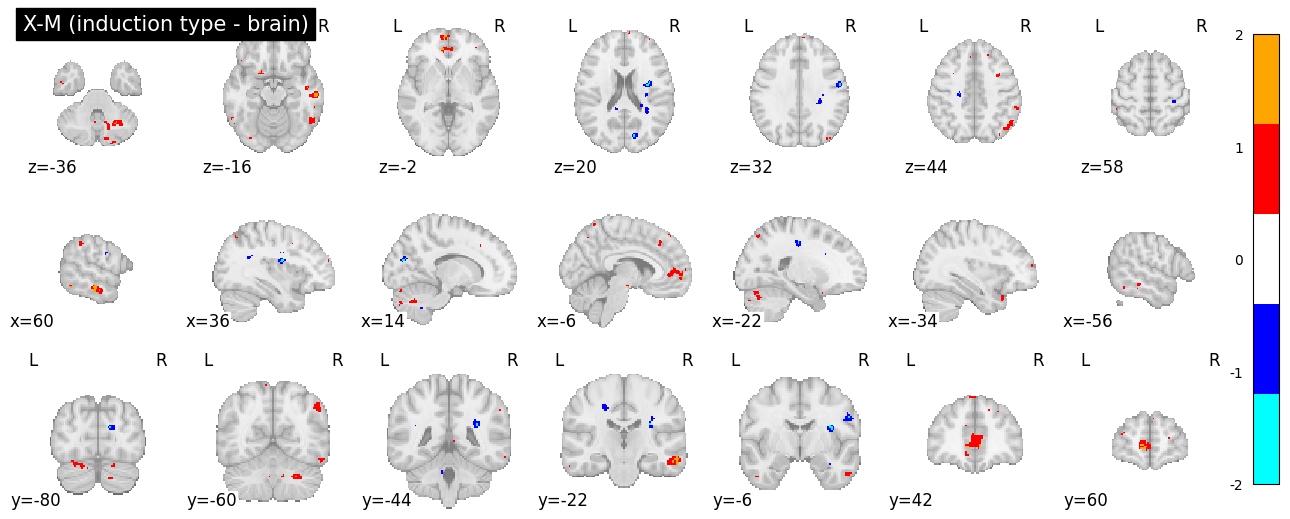

In [6]:
# X-M
img = nib.load(f'{dir_mediation}/thres_XM.nii.gz')
my_cmp = ListedColormap(['cyan', 'blue', 'white', 'white', 'red', 'orange'])
nip.plot_stat_map(img, cmap=my_cmp, display_mode='mosaic', title='X-M (induction type - brain)')

In [7]:
beta = nib.load(f'{dir_mediation}/beta_XM.nii.gz')
clust_table = get_clusters_table(stat_img=nib.load(f'{dir_mediation}/fdr_logq_XM.nii.gz'),
                   stat_threshold=-np.log10(0.05),
                   cluster_threshold=0,
                   #min_distance=20
                   ) 
clust_table['region'] = 'N/A'
clust_table['yeo_network'] = 'N/A'

for i, row in clust_table.iterrows():
    x, y, z = row['X'], row['Y'], row['Z']
    region, yeo_nw, prob = get_difumo_label([x,y,z])
    clust_table.loc[row.name, 'region'] = region
    clust_table.loc[row.name, 'yeo_network'] = yeo_nw

clust_table

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3),region,yeo_network
0,1,60.0,-22.0,-18.0,303.833752,184,Inferior temporal sulcus middle RH,ContB
1,2,-22.0,-20.0,44.0,303.833752,16,Corticospinal tract superior,No network found
2,3,-18.0,10.0,-16.0,303.833752,8,Corpus callosum rostrum,LimbicB
3,4,-10.0,42.0,-2.0,303.833752,16,Ventromedial prefrontal cortex LH,DefaultA
4,5,-8.0,38.0,-4.0,303.833752,8,Cingulate sulcus antero-inferior,DefaultA
5,6,-8.0,60.0,-4.0,303.833752,72,Ventromedial prefrontal cortex anterior,LimbicB
6,7,-4.0,58.0,0.0,303.833752,8,Ventromedial prefrontal cortex LH,DefaultA
7,8,-4.0,58.0,-4.0,303.833752,8,Ventromedial prefrontal cortex anterior,LimbicB
8,9,-2.0,58.0,-2.0,303.833752,8,Ventromedial prefrontal cortex LH,DefaultA
9,10,6.0,42.0,0.0,303.833752,16,Ventromedial prefrontal cortex,DefaultA


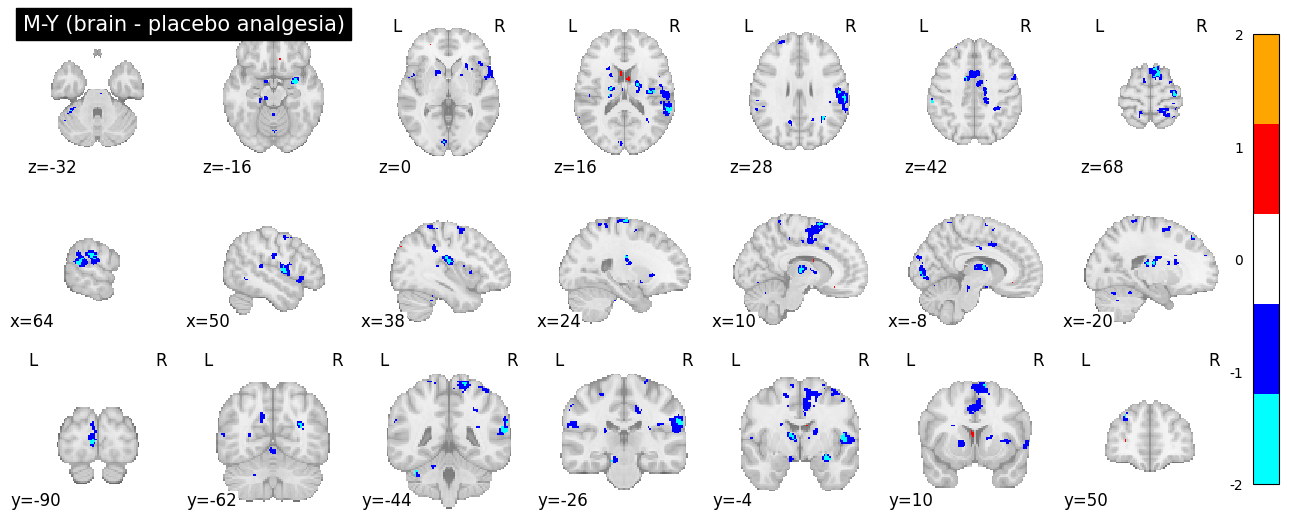

In [9]:
# M-Y
img = nib.load(f'{dir_mediation}/thres_MY.nii.gz')
my_cmp = ListedColormap(['cyan', 'blue', 'white', 'white', 'red', 'orange'])
nip.plot_stat_map(img, cmap=my_cmp, display_mode='mosaic', title='M-Y (brain - placebo analgesia)')

In [10]:
beta = nib.load(f'{dir_mediation}/beta_MY.nii.gz')
clust_table = get_clusters_table(stat_img=nib.load(f'{dir_mediation}/fdr_logq_MY.nii.gz'),
                   stat_threshold=-np.log10(0.05),
                   cluster_threshold=0,
                   #min_distance=20
                   ) 
clust_table['region'] = 'N/A'
clust_table['yeo_network'] = 'N/A'

for i, row in clust_table.iterrows():
    x, y, z = row['X'], row['Y'], row['Z']
    region, yeo_nw, prob = get_difumo_label([x,y,z])
    clust_table.loc[row.name, 'region'] = region
    clust_table.loc[row.name, 'yeo_network'] = yeo_nw

clust_table

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3),region,yeo_network
0,1,62.0,-42.0,18.0,304.426350,408,Superior temporal gyrus posterior RH,TempPar
1,2,16.0,-16.0,42.0,304.426350,8,Cingulate sulcus posterior RH,SomMotA
2,3,12.0,6.0,68.0,304.426350,376,Superior frontal gyrus mid-posterior,SalVentAttnB
3,3a,4.0,4.0,68.0,304.426350,,Cerebrospinal fluid (between interhemispheric ...,SalVentAttnA
4,3b,8.0,16.0,68.0,3.429259,,Superior frontal gyrus postero-superior LH,SalVentAttnB
...,...,...,...,...,...,...,...,...
66,59,52.0,20.0,-6.0,1.393172,8,Lateral fissure anterior,TempPar
67,60,56.0,2.0,44.0,1.387803,8,Cerebrospinal fluid (between central sulcus an...,SalVentAttnA
68,61,2.0,-72.0,-16.0,1.348217,8,Cerebellum V RH,No network found
69,62,16.0,-28.0,40.0,1.339756,8,Callosomarginal sulcus inferior,SalVentAttnA


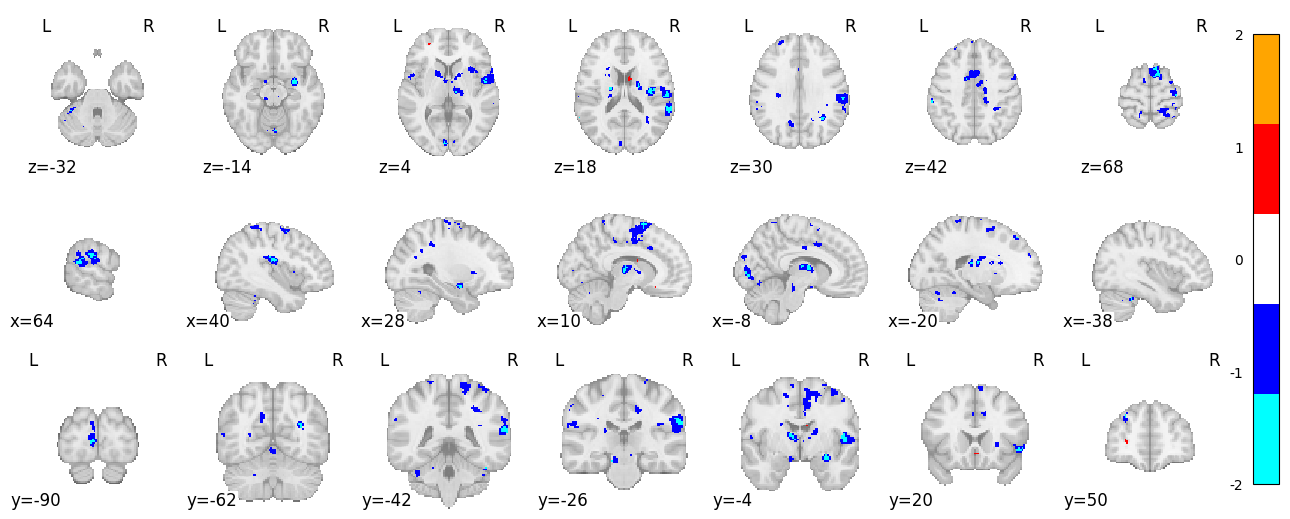

In [11]:
# X-M-Y
img = nib.load(f'{dir_mediation}/thres_XMY.nii.gz')
my_cmp = ListedColormap(['cyan', 'blue', 'white', 'white', 'red', 'orange'])
nip.plot_stat_map(img, cmap=my_cmp, display_mode='mosaic')

In [12]:
beta = nib.load(f'{dir_mediation}/beta_XMY.nii.gz')
clust_table = get_clusters_table(stat_img=nib.load(f'{dir_mediation}/fdr_logq_XMY.nii.gz'),
                   stat_threshold=-np.log10(0.05),
                   cluster_threshold=0,
                   #min_distance=20
                   ) 
clust_table['region'] = 'N/A'
clust_table['yeo_network'] = 'N/A'

for i, row in clust_table.iterrows():
    x, y, z = row['X'], row['Y'], row['Z']
    region, yeo_nw, prob = get_difumo_label([x,y,z])
    clust_table.loc[row.name, 'region'] = region
    clust_table.loc[row.name, 'yeo_network'] = yeo_nw

clust_table

/Users/tspisak/src/placebo-conditioning-meta-analysis/venv/lib/python3.9/site-packages/nilearn/reporting/get_clusters_table.py:104: UserWarning: Attention: At least one of the (sub)peaks falls outside of the cluster body. Identifying the nearest in-cluster voxel.
  warnings.warn(


,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3),region,yeo_network
0,1,62.0,-42.0,18.0,304.408780,384,Superior temporal gyrus posterior RH,TempPar
1,2,22.0,-10.0,18.0,304.408780,72,Globus pallidus RH,No network found
2,3,18.0,-46.0,70.0,304.408780,104,Superior parietal sulcus superior,DorsAttnB
3,4,20.0,-12.0,12.0,304.408780,16,Globus pallidus RH,No network found
4,5,-60.0,-32.0,40.0,304.408780,56,Supramarginal gyrus antero-superior LH,DorsAttnB
...,...,...,...,...,...,...,...,...
73,65,52.0,0.0,4.0,1.394994,8,Heschl’s gyrus RH,SomMotB
74,66,-2.0,4.0,12.0,1.367461,8,Lateral ventricles anterior horns,No network found
75,67,56.0,2.0,44.0,1.343354,8,Cerebrospinal fluid (between central sulcus an...,SalVentAttnA
76,68,-14.0,-26.0,-18.0,1.343354,8,Cerebellar peduncles,DefaultC


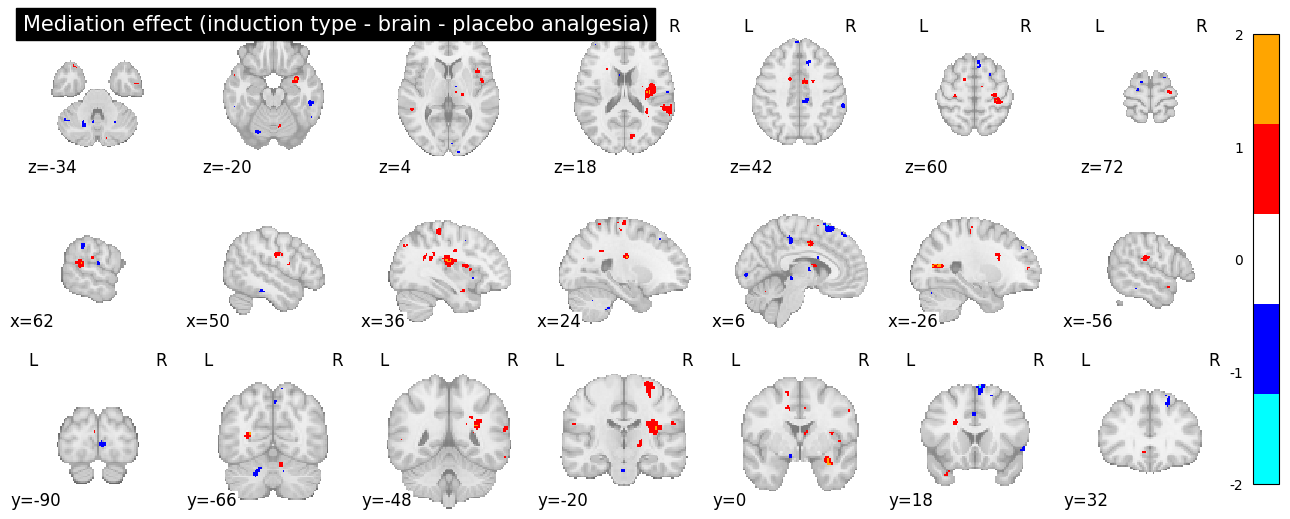

In [13]:
#ACME
img = nib.load(f'{dir_mediation}/thres_ACME.nii.gz')
my_cmp = ListedColormap(['cyan', 'blue', 'white', 'white', 'red', 'orange'])
nip.plot_stat_map(img, cmap=my_cmp, display_mode='mosaic', title='Mediation effect (induction type - brain - placebo analgesia)')

In [14]:
beta = nib.load(f'{dir_mediation}/beta_ACME.nii.gz')
clust_table = get_clusters_table(stat_img=nib.load(f'{dir_mediation}/fdr_logq_ACME.nii.gz'),
                   stat_threshold=-np.log10(0.05),
                   cluster_threshold=0,
                   #min_distance=20
                   ) 
clust_table['region'] = 'N/A'
clust_table['yeo_network'] = 'N/A'

for i, row in clust_table.iterrows():
    x, y, z = row['X'], row['Y'], row['Z']
    region, yeo_nw, prob = get_difumo_label([x,y,z])
    clust_table.loc[row.name, 'region'] = region
    clust_table.loc[row.name, 'yeo_network'] = yeo_nw

clust_table

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3),region,yeo_network
0,1,-26.0,-66.0,14.0,303.450535,40,Optic radiation LH,No network found
1,2,-22.0,-76.0,10.0,303.450535,8,Calcarine sulcus mid-anterior,VisPeri
2,3,6.0,18.0,66.0,303.450535,8,Cerebrospinal fluid (between superior frontal ...,DefaultB
3,4,6.0,-4.0,38.0,303.450535,8,Cingulum middle,SalVentAttnA
4,5,24.0,-14.0,24.0,303.450535,8,Superior longitudinal fasciculus III middle RH,No network found
5,6,-28.0,-60.0,10.0,303.450535,16,Calcarine sulcus mid-anterior,VisPeri
6,7,32.0,-18.0,18.0,303.450535,8,Insula postero-inferior medial,SomMotB
7,8,-26.0,-74.0,12.0,303.450535,8,Forceps major,No network found
8,9,-26.0,-70.0,14.0,303.450535,24,Optic radiation LH,No network found
9,10,34.0,0.0,-22.0,303.450535,48,Superior temporal gyrus medial anterior RH,SalVentAttnA


In [13]:
!fsleyes f'{dir_mediation}/beta_ACME.nii.gz'

zsh:1: command not found: fsleyes


In [1]:
get_difumo_label([8,15,66])

NameError: name 'get_difumo_label' is not defined